In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

ModuleNotFoundError: No module named 'numpy'

In [ ]:
CHUNK = 1024               
AMPLITUDE_LIMIT = 1000      
RATE = 44100               

In [ ]:
# random signal
t = np.arange(CHUNK) / RATE
signal = 200*np.sin(2*np.pi*440*t) + 100*np.sin(2*np.pi*880*t) + 50*np.random.randn(CHUNK)

In [ ]:
signal

array([-115.04309087,   18.47060812,   44.61583805, ...,  203.32577751,
        361.15165193,  185.92505957], shape=(1024,))

In [ ]:
signal = np.clip(signal, -AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)

In [ ]:
signal

array([-115.04309087,   18.47060812,   44.61583805, ...,  203.32577751,
        361.15165193,  185.92505957], shape=(1024,))

In [ ]:
# FIR filter 
FILTER_CUTOFF = 500          # Cutoff frequency in Hz
NUM_TAPS = 101               # Number of FIR filter taps (odd number recommended)

# filter
fir_coeff = firwin(NUM_TAPS, FILTER_CUTOFF, fs=RATE)
# Apply filter
signal_filtered = lfilter(fir_coeff, [1.0], signal)

In [ ]:
signal_filtered

array([ 2.66164699e-02,  1.87503469e-02,  5.46208031e-03, ...,
       -1.05854141e+02, -1.09187355e+02, -1.12155456e+02], shape=(1024,))

In [ ]:
custom_kernel = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# convolution 
signal_processed = np.convolve(signal, custom_kernel, mode='same')

# clip to avoid overflow 
signal_processed = np.clip(signal_processed, -AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)

In [ ]:
signal_processed

array([-1000.        ,  1000.        ,  -247.04367969, ...,
       -1000.        ,  1000.        ,   106.98467218], shape=(1024,))

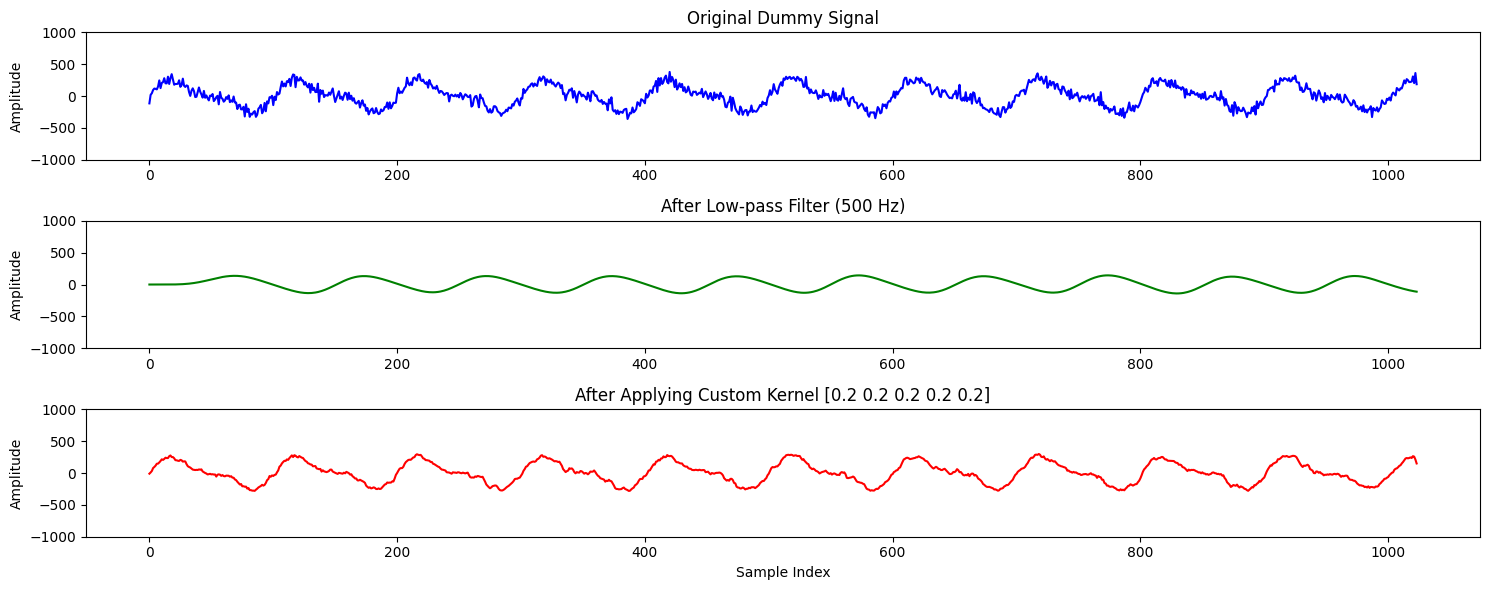

In [ ]:
plt.figure(figsize=(15, 6))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(signal, color='blue')
plt.title("Original Dummy Signal")
plt.ylabel("Amplitude")
plt.ylim(-AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)

# low-pass filter
plt.subplot(3, 1, 2)
plt.plot(signal_filtered, color='green')
plt.title(f"After Low-pass Filter ({FILTER_CUTOFF} Hz)")
plt.ylabel("Amplitude")
plt.ylim(-AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)

# custom kernel
plt.subplot(3, 1, 3)
plt.plot(signal_processed, color='red')
plt.title(f"After Applying Custom Kernel {custom_kernel}")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.ylim(-AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)

plt.tight_layout()
plt.show()